In [31]:
import graphlab
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = graphlab.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_sframe[name] to be feature^power
            poly_sframe[name] = feature **power
    return poly_sframe

In [4]:
#to test poly_sframe
tmp = graphlab.SArray([1., 2., 3.])
print polynomial_sframe(tmp, 3)

+---------+---------+---------+
| power_1 | power_2 | power_3 |
+---------+---------+---------+
|   1.0   |   1.0   |   1.0   |
|   2.0   |   4.0   |   8.0   |
|   3.0   |   9.0   |   27.0  |
+---------+---------+---------+
[3 rows x 3 columns]



In [3]:
sales = graphlab.SFrame('kc_house_data.gl/')
sales = sales.sort(['sqft_living', 'price'])

In [4]:
poly15_data = polynomial_sframe(sales['sqft_living'], 15)
my_features = poly15_data.column_names()
poly15_data['price'] = sales['price']

In [5]:
model_15 = graphlab.linear_regression.create(poly15_data,
                                            target = 'price',
                                            features = my_features,
                                             l2_penalty = 1e-5,
                                            validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 1.104859     | 2662555.737551     | 245656.462164 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [6]:
model_15.get('coefficients')

name,index,value,stderr
(intercept),None,167924.862608,nan
power_1,None,103.090936636,nan
power_2,None,0.134604567808,nan
power_3,None,-0.000129071373619,nan
power_4,None,5.18928989161e-08,nan
power_5,None,-7.77169372788e-12,nan
power_6,None,1.71144963884e-16,nan
power_7,None,4.5117779528e-20,nan
power_8,None,-4.78838460102e-25,nan
power_9,None,-2.33343496929e-28,nan


In [7]:
subset1, subset2 = sales.random_split(.5, seed=0)
set_1, set_2 = subset1.random_split(.5, seed=0)
set_3, set_4 = subset2.random_split(.5,seed=0)

#### Next, fit a 15th degree polynomial on set_1, set_2, set_3, and set_4, using 'sqft_living' to predict prices. Print the weights and make a plot of the resulting model. with a small l2 penalty

In [8]:
poly15_set1 = polynomial_sframe(set_1['sqft_living'], 15)
poly15_set2 = polynomial_sframe(set_2['sqft_living'], 15)
poly15_set3 = polynomial_sframe(set_3['sqft_living'], 15)
poly15_set4 = polynomial_sframe(set_4['sqft_living'], 15)

In [9]:
myfeatures_set1 = poly15_set1.column_names()
myfeatures_set2 = poly15_set2.column_names()
myfeatures_set3 = poly15_set3.column_names()
myfeatures_set4 = poly15_set4.column_names()

In [10]:
poly15_set1['price'] = set_1['price']
poly15_set2['price'] = set_2['price']
poly15_set3['price'] = set_3['price']
poly15_set4['price'] = set_4['price']

In [110]:
model_set1 = graphlab.linear_regression.create(poly15_set1,
                                               target = 'price',
                                               features = myfeatures_set1,
                                               l2_penalty = 1e-5,
                                               validation_set = None,
                                              verbose = False)

model_set2 = graphlab.linear_regression.create(poly15_set2,
                                               target = 'price',
                                               features = myfeatures_set2,
                                               l2_penalty = 1e-5,
                                               validation_set = None,
                                              verbose = False)

model_set3 = graphlab.linear_regression.create(poly15_set3,
                                               target = 'price',
                                               features = myfeatures_set3,
                                               l2_penalty = 1e-5,
                                               validation_set = None,
                                              verbose = False)

model_set4 = graphlab.linear_regression.create(poly15_set4,
                                               target = 'price',
                                               features = myfeatures_set4,
                                               l2_penalty = 1e-5,
                                               validation_set = None,
                                              verbose = False)

In [111]:
print "model 1:", model_set1.get('coefficients')
print "model 2:", model_set2.get('coefficients')
print "model 3:", model_set3.get('coefficients')
print "model 4:", model_set4.get('coefficients')

model 1: +-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   9306.46554874    |   719639.980873   |
|   power_1   |  None |    585.86580809    |   2989.33041009   |
|   power_2   |  None |  -0.397305877958   |    5.1431277244   |
|   power_3   |  None | 0.000141470890761  |  0.0048616511985  |
|   power_4   |  None | -1.52945961917e-08 | 2.83657579983e-06 |
|   power_5   |  None | -3.79756708968e-13 | 1.09584374364e-09 |
|   power_6   |  None | 5.97481905044e-17  | 2.97158277304e-13 |
|   power_7   |  None | 1.06888523844e-20  |  5.9463866135e-17 |
|   power_8   |  None | 1.59343810682e-25  | 8.93876714055e-21 |
|   power_9   |  None | -6.92834873348e-29 | 1.00511931468e-24 |
+-------------+-------+--------------------+-------------------+
[16 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use p

plot 1


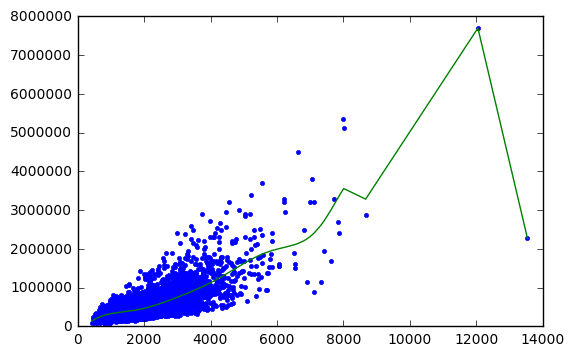

In [13]:
print "plot 1"
plt.plot(poly15_set1['power_1'], poly15_set1['price'], '.',
        poly15_set1['power_1'], model_set1.predict(poly15_set1), '-')

plot 2


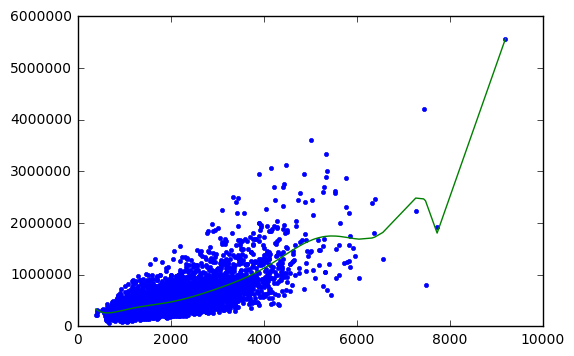

In [14]:
print "plot 2"
plt.plot(poly15_set2['power_1'], poly15_set2['price'], '.',
        poly15_set2['power_1'], model_set2.predict(poly15_set2), '-')

plot 3


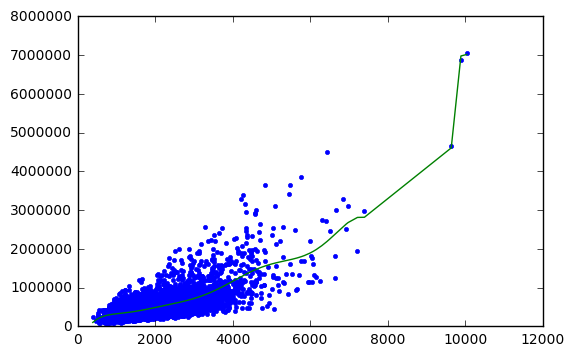

In [15]:
print "plot 3"
plt.plot(poly15_set3['power_1'], poly15_set3['price'], '.',
        poly15_set3['power_1'], model_set3.predict(poly15_set3), '-')

plot 4


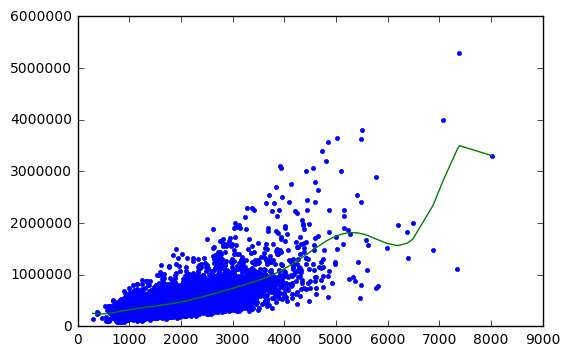

In [16]:
print "plot 4"
plt.plot(poly15_set4['power_1'], poly15_set4['price'], '.',
        poly15_set4['power_1'], model_set4.predict(poly15_set4), '-')

## with a large l2 penalty

In [104]:
model_set1_ridge = graphlab.linear_regression.create(poly15_set1,
                                               target = 'price',
                                               features = myfeatures_set1,
                                               l2_penalty = 1e5,
                                               validation_set = None,
                                                    verbose = False)

model_set2_ridge = graphlab.linear_regression.create(poly15_set2,
                                               target = 'price',
                                               features = myfeatures_set2,
                                               l2_penalty = 1e5,
                                               validation_set = None,
                                                    verbose = False)

model_set3_ridge = graphlab.linear_regression.create(poly15_set3,
                                               target = 'price',
                                               features = myfeatures_set3,
                                               l2_penalty = 1e5,
                                               validation_set = None,
                                                    verbose = False)

model_set4_ridge = graphlab.linear_regression.create(poly15_set4,
                                               target = 'price',
                                               features = myfeatures_set4,
                                               l2_penalty = 1e5,
                                               validation_set = None,
                                                    verbose = False)

In [105]:
print "model 1:", model_set1_ridge.get('coefficients')
print "model 2:", model_set2_ridge.get('coefficients')
print "model 3:", model_set3_ridge.get('coefficients')
print "model 4:", model_set4_ridge.get('coefficients')

model 1: +-------------+-------+-------------------+-------------------+
|     name    | index |       value       |       stderr      |
+-------------+-------+-------------------+-------------------+
| (intercept) |  None |   530317.024516   |   1082970.05883   |
|   power_1   |  None |   2.58738875673   |   4498.57625495   |
|   power_2   |  None |  0.00127414400592 |   7.73977750303   |
|   power_3   |  None | 1.74934226932e-07 |  0.00731618979541 |
|   power_4   |  None | 1.06022119097e-11 | 4.26869926971e-06 |
|   power_5   |  None | 5.42247604482e-16 | 1.64911065957e-09 |
|   power_6   |  None | 2.89563828343e-20 |  4.4718682342e-13 |
|   power_7   |  None | 1.65000666351e-24 | 8.94858378047e-17 |
|   power_8   |  None | 9.86081528409e-29 |  1.3451750088e-20 |
|   power_9   |  None | 6.06589348254e-33 | 1.51258150225e-24 |
+-------------+-------+-------------------+-------------------+
[16 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_

plot 1


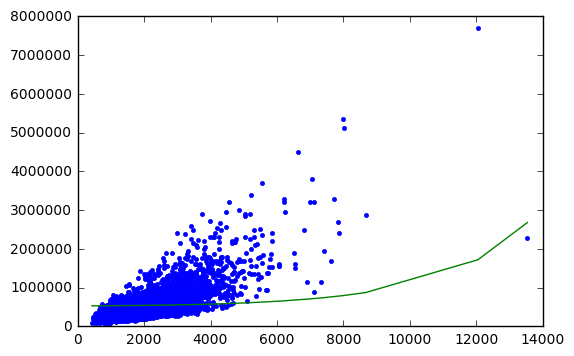

In [106]:
print "plot 1"
plt.plot(poly15_set1['power_1'], poly15_set1['price'], '.',
        poly15_set1['power_1'], model_set1_ridge.predict(poly15_set1), '-')

plot 2


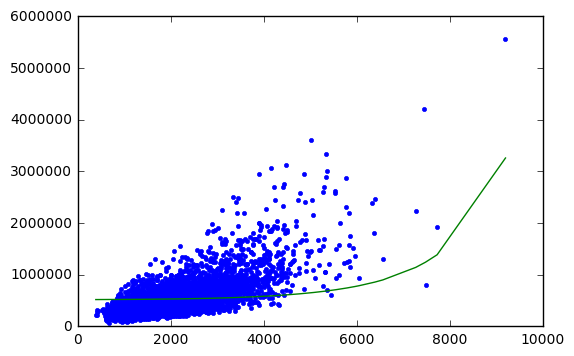

In [107]:
print "plot 2"
plt.plot(poly15_set2['power_1'], poly15_set2['price'], '.',
        poly15_set2['power_1'], model_set2_ridge.predict(poly15_set2), '-')

plot 3


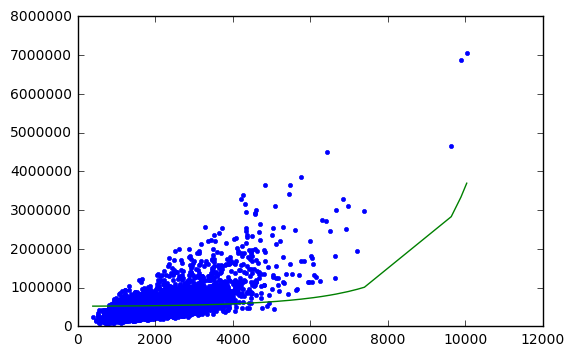

In [108]:
print "plot 3"
plt.plot(poly15_set3['power_1'], poly15_set3['price'], '.',
        poly15_set3['power_1'], model_set3_ridge.predict(poly15_set3), '-')

plot 4


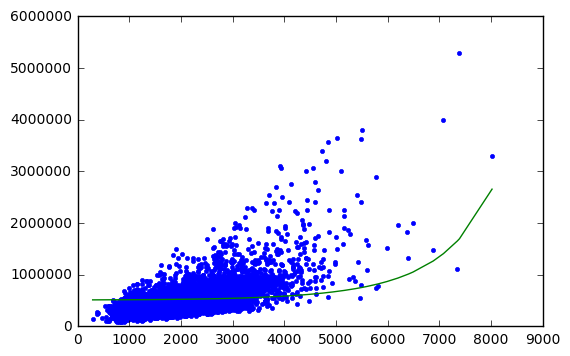

In [109]:
print "plot 4"
plt.plot(poly15_set4['power_1'], poly15_set4['price'], '.',
        poly15_set4['power_1'], model_set4_ridge.predict(poly15_set4), '-')

In [23]:
#GraphLab Create has a utility function for shuffling a given SFrame. 
#We reserve 10% of the data as the test set and shuffle the remainder

(train_valid, test) = sales.random_split(.9, seed=1)
train_valid_shuffled = graphlab.toolkits.cross_validation.shuffle(train_valid, random_seed=1)

In [24]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in xrange(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print i, (start, end)

0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)


In [25]:
#array slicing with SFrame
train_valid_shuffled[0:10] # rows 0 to 9

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
2780400035,2014-05-05 00:00:00+00:00,665000.0,4.0,2.5,2800.0,5900,1,0
1703050500,2015-03-21 00:00:00+00:00,645000.0,3.0,2.5,2490.0,5978,2,0
5700002325,2014-06-05 00:00:00+00:00,640000.0,3.0,1.75,2340.0,4206,1,0
0475000510,2014-11-18 00:00:00+00:00,594000.0,3.0,1.0,1320.0,5000,1,0
0844001052,2015-01-28 00:00:00+00:00,365000.0,4.0,2.5,1904.0,8200,2,0
2658000373,2015-01-22 00:00:00+00:00,305000.0,4.0,2.0,1610.0,6250,1,0
3750603471,2015-03-27 00:00:00+00:00,239950.0,3.0,2.5,1560.0,4800,2,0
2114700540,2014-10-21 00:00:00+00:00,366000.0,3.0,2.5,1320.0,4320,1,0
2596400050,2014-07-30 00:00:00+00:00,375000.0,3.0,1.0,1960.0,7955,1,0
4140900050,2015-01-26 00:00:00+00:00,440000.0,4.0,1.75,2180.0,10200,1,0


In [26]:
validation4 = train_valid_shuffled[5818: 7757]

In [27]:
#verify above function
print int(round(validation4['price'].mean(), 0))

536353


In [28]:
n = len(train_valid_shuffled)
first_two = train_valid_shuffled[0:5818]
last_two = train_valid_shuffled[7757:n]
train4 = first_two.append(last_two)

In [29]:
#verify above function
print int(round(train4['price'].mean(), 0))

539437


Now we are ready to implement k-fold cross-validation. Write a function that computes k validation errors by designating each of the k segments as the validation set. It accepts as parameters (i) `k`, (ii) `l2_penalty`, (iii) dataframe, (iv) name of output column (e.g. `price`) and (v) list of feature names. The function returns the average validation error using k segments as validation sets.

* For each i in [0, 1, ..., k-1]:
  * Compute starting and ending indices of segment i and call 'start' and 'end'
  * Form validation set by taking a slice (start:end+1) from the data.
  * Form training set by appending slice (end+1:n) to the end of slice (0:start).
  * Train a linear model using training set just formed, with a given l2_penalty
  * Compute validation error using validation set just formed

In [123]:
def k_fold_cross_validation(k, l2_penalty_val, data, output_name, features_list):
    n = len(data)
    RSS_sum = 0

    for i in xrange(k):
        start = (n*i)/k
        end = (n*(i+1))/k-1
        validation = data[start:end+1]
        first = data[0:start]
        last = data[end+1:n]
        train = first.append(last)
        model = graphlab.linear_regression.create(train,
                                                  target = output_name,
                                                  features = features_list,
                                                  l2_penalty = l2_penalty_val,
                                                  validation_set = None,
                                                  verbose = False)
        residual = validation['price'] - model.predict(validation)
        error = sum(residual*residual)
        RSS_sum += error
    avg_validaiton_error = RSS_sum / k
    return avg_validaiton_error

In [124]:
#a loop to find the model that minimizes the average validation error
a_v_e = []
poly15_rr = polynomial_sframe(train_valid_shuffled['sqft_living'], 15)
myfeatures_rr = poly15_rr.column_names()
poly15_rr['price'] = train_valid_shuffled['price']
penalty_list = np.logspace(1, 7, num=13)

for l2_penalty in penalty_list:
    validation_error = k_fold_cross_validation(10,l2_penalty,poly15_rr,'price', myfeatures_rr)
    a_v_e.append(validation_error)

In [125]:
min_l2_penalty = penalty_list[a_v_e.index(min(a_v_e))] 
print "l2 penalty : ", min_l2_penalty
print "minimum avg validation error: ", min(a_v_e)

l2 penalty :  1000.0
minimum avg validation error:  1.21192264451e+14


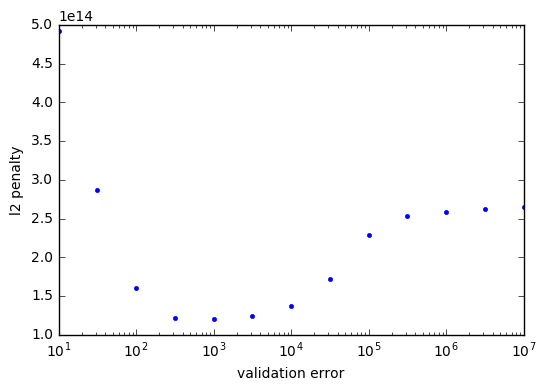

In [127]:
# Plot the l2_penalty values in the x axis and the cross-validation error in the y axis.
# Using plt.xscale('log') will make your plot more intuitive.
plt.xlabel('validation error')
plt.ylabel('l2 penalty')
plt.plot(penalty_list, a_v_e, '.')
plt.xscale('log')

In [130]:
#final model with min avg val error

poly15_train = polynomial_sframe(train_valid_shuffled['sqft_living'], 15)
myfeatures_train = poly15_train.column_names()
poly15_train['price'] = train_valid_shuffled['price']

final_model = graphlab.linear_regression.create(poly15_train,
                                               target = 'price',
                                               features = myfeatures_train,
                                               l2_penalty = 1000.0,
                                               validation_set = None,
                                               verbose = False)
poly_test = polynomial_sframe(test['sqft_living'], 15)
residual_RSS =  test['price'] - final_model.predict(poly_test)
final_RSS = sum(residual_RSS*residual_RSS)
print "RSS on the TEST data: ", final_RSS

RSS on the TEST data:  1.28780855058e+14
